# 学前须知

恭喜你，完成「Python从0到1（一）」阶段的学习后，已经掌握了Python的语法与数据结构的主要内容，可以实现很多基础的自动化功能，本章将学习`函数式编程`和`面向对象编程`的相关知识，让你能够更加高效的组织代码，并在后续的案例实践中进阶。

本节内容要点：
- **掌握**切片和列表生成式


- **理解并掌握**函数式编程


- **理解**面向对象编程


- 开始独立学习新知识，并学习套用

⚠️注意：从本节后尾部安排了少许自主学习的内容，这是有可能你会写出各类bug，先别着急，学习分析代码报错信息，然后对应检查、思考、总结，debug的能力唯有靠实践积累，没有捷径。

# 切片与迭代

## 切片

取一个list或tuple的部分元素是非常常见的操作。比如，一个list如下：

In [1]:
L = ['Michael', 'Sarah', 'Tracy', 'Bob', 'Jack']

取前3个元素，应该怎么做？

笨办法：

In [2]:
L[0], L[1], L[2]

('Michael', 'Sarah', 'Tracy')

之所以是笨办法是因为扩展一下，取前N个元素就没辙了。

例如上述列表`L`，需要取前4个元素，你可以用循环：

In [4]:
# 用循环写代码试试

对这种经常取指定索引范围的操作，用循环十分繁琐，因此，Python提供了切片（Slice）操作符，能大大简化这种操作。

对应上面的问题，取前3个元素，用一行代码就可以完成切片：

In [7]:
L[0:3]

['Michael', 'Sarah', 'Tracy']

`L[0:3]`表示，从索引`0`开始取，直到索引`3`为止，但不包括索引`3`。即索引`0`，`1`，`2`，正好是3个元素。**通常来说，各类索引取数都是左闭右开**，如果不确定的写代码试试就好。

如果第一个索引是`0`，还可以省略：

In [10]:
# 分别运行以下代码试试

print(L[:3])

# 反过来如果是取到结尾，是不是也可以省略呢？用代码试试

print(L[1:3])

# 类似的，既然Python支持L[-1]取倒数第一个元素，那么它同样支持倒数切片
print(L[-2:])

# 记住倒数第一个元素的索引是-1,动手试试

L = list(range(100))
print(L[:10])

print(L[:10:2]) #前10个数，每隔1(2-1)个取一个：

print(L[::5]) #所有数，每隔4(5-1)个取一个

# L[:] #全取

[0, 1, 2]
[1, 2]
[98, 99]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 2, 4, 6, 8]
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]


tuple（元组）也可以用切片操作，方法与列表类似：

In [11]:
(0, 1, 2, 3, 4, 5)[:3]

(0, 1, 2)

字符串`'xxx'`也可以看成是一种list，每个元素就是一个字符。因此，字符串也可以用切片操作，只是操作结果仍是字符串：

In [12]:
'boolart'[0:4]

'bool'

In [13]:
'boolart'[1:6:2]

'olr'

In [14]:
'boolart'[::-1]

'traloob'

### 小练习：有一个字符串，按照要求切除内容

practice  = "有些人总是这么不一样，看了一眼，就能让人记住很多年。而有些人，哪怕看了再多年，也没在心头住下。"

在字符串中选取出以下字符部分

`这么不一样`

In [15]:
practice  = "有些人总是这么不一样，看了一眼，就能让人记住很多年。而有些人，哪怕看了再多年，也没在心头住下。"

## 迭代

如果给定一个list或tuple，我们可以通过`for`循环来遍历这个list或tuple，这种遍历我们称为迭代（Iteration）。

In [20]:
l = ['a', 'b','c']
for key in l:
    print(key)

a
b
c


In [22]:
# 对字典的key迭代，注意字典的key是没有顺序的，所以迭代结果可能会有差异

d = {'a': 1, 'b': 2, 'c': 3}
for key in d:
    print(key)

a
b
c


默认情况下，`dict`迭代的是key。如果要迭代value，可以用`for value in d.values()`，如果要同时迭代key和value，可以用`for k, v in d.items()`。

由于字符串也是可迭代对象，因此，也可以作用于`for`循环：

In [23]:
for ch in 'ABC':
    print(ch)

A
B
C


所以，当我们使用`for`循环时，只要作用于一个可迭代对象，`for`循环就可以正常运行，而我们不太关心该对象究竟是`list`还是其他数据类型。

那么，如何判断一个对象是可迭代对象呢？方法是通过`collections.abc`模块的`Iterable`类型判断：

In [24]:
from collections.abc import Iterable

In [25]:
isinstance('abc', Iterable) # str是否可迭代

True

In [26]:
isinstance([1,2,3], Iterable) # list是否可迭代

True

In [27]:
isinstance(123, Iterable) # 整数是否可迭代

False

最后一个小问题，如果要对`list`实现类似Java那样的下标循环怎么办？Python内置的`enumerate`函数可以把一个`list`变成索引-元素对，这样就可以在`for`循环中同时迭代索引和元素本身：

In [28]:
for i, value in enumerate(['A', 'B', 'C']):
    print(i, value)

0 A
1 B
2 C


上面的for循环里，同时引用了两个变量，在Python里是很常见的，比如下面的代码：

In [29]:
for x, y in [(1, 1), (2, 4), (3, 9)]:
    print(x, y)

1 1
2 4
3 9


In [30]:
# 试试写代码，使用迭代查找一个list中最小和最大值，并返回一个tuple：

## 列表生成式

列表生成式即List Comprehensions，是Python内置的非常简单却强大的可以用来创建list的生成式。

举个例子，要生成`list [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]`可以用`list(range(1, 11))`：

In [31]:
list(range(1, 11))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

但如果要生成`[1x1, 2x2, 3x3, ..., 10x10]`怎么做？方法一是循环：

In [32]:
# 试试快速用循环写出

但是循环太繁琐，而列表生成式则可以用一行语句代替循环生成上面的list：

In [33]:
[x * x for x in range(1, 11)]

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

写列表生成式时，把要生成的元素`x * x`放到前面，后面跟`for`循环，就可以把list创建出来，十分有用，多写几次，很快就可以熟悉这种语法。

`for`循环后面还可以加上`if`判断，这样我们就可以筛选出仅偶数的平方：

In [34]:
[x * x for x in range(1, 11) if x % 2 == 0]

[4, 16, 36, 64, 100]

还可以使用两层循环，可以生成全排列：

In [35]:
[m + n for m in 'ABC' for n in 'XYZ']

['AX', 'AY', 'AZ', 'BX', 'BY', 'BZ', 'CX', 'CY', 'CZ']

三层和三层以上的循环就很少用到了。

运用列表生成式，可以写出非常简洁的代码。例如，列出当前目录下的所有文件和目录名，可以通过一行代码实现：

In [36]:
import os # 导入os模块，模块的概念后面讲到
#[d for d in os.listdir('.')] # os.listdir可以列出文件和目录

`for`循环其实可以同时使用两个甚至多个变量，比如`dict`的`items()`可以同时迭代key和value：

In [37]:
d = {'x': 'A', 'y': 'B', 'z': 'C' }
for k, v in d.items():
    print(k, '=', v)

x = A
y = B
z = C


因此，列表生成式也可以使用两个变量来生成list：

In [38]:
d = {'x': 'A', 'y': 'B', 'z': 'C' }
[k + '=' + v for k, v in d.items()]

['x=A', 'y=B', 'z=C']

最后把一个list中所有的字符串变成小写：

In [39]:
L = ['Hello', 'World', 'IBM', 'Apple']
[s.lower() for s in L]

['hello', 'world', 'ibm', 'apple']

**`if ... else`**

使用列表生成式的时候，有些童鞋经常搞不清楚`if...else`的用法。

例如，以下代码正常输出偶数：

In [40]:
[x for x in range(1, 11) if x % 2 == 0]

[2, 4, 6, 8, 10]

但是，我们不能在最后的`if`加上`else`：

In [41]:
[x for x in range(1, 11) if x % 2 == 0 else 0]

SyntaxError: invalid syntax (<ipython-input-41-9113318dd863>, line 1)

这是因为跟在`for`后面的`if`是一个筛选条件，不能带`else`，否则如何筛选？

另一些童鞋发现把`if`写在`for`前面必须加`else`，否则报错：

In [42]:
[x if x % 2 == 0 for x in range(1, 11)]

SyntaxError: invalid syntax (<ipython-input-42-0846473fb08f>, line 1)

这是因为`for`前面的部分是一个表达式，它必须根据`x`计算出一个结果。因此，考察表达式：`x if x % 2 == 0`，它无法根据`x`计算出结果，因为缺少`else`，必须加上`else`：

In [43]:
[x if x % 2 == 0 else -x for x in range(1, 11)]

[-1, 2, -3, 4, -5, 6, -7, 8, -9, 10]

上述`for`前面的表达式`x if x % 2 == 0 else -x`才能根据`x`计算出确定的结果。

可见，在一个列表生成式中，`for`前面的`if ... else`是表达式，而`for`后面的`if`是过滤条件，不能带`else`。

## 生成器

通过列表生成式，我们可以直接创建一个列表。但是，受到内存限制，列表容量肯定是有限的。而且，创建一个包含100万个元素的列表，不仅占用很大的存储空间，如果我们仅仅需要访问前面几个元素，那后面绝大多数元素占用的空间都白白浪费了。

所以，如果列表元素可以按照某种算法推算出来，那我们是否可以在循环的过程中不断推算出后续的元素呢？这样就不必创建完整的list，从而节省大量的空间。在Python中，这种一边循环一边计算的机制，称为生成器：generator。

要创建一个generator，有很多种方法。第一种方法很简单，只要把一个列表生成式的`[]`改成`()`，就创建了一个generator：

In [44]:
L = [x * x for x in range(10)]
L

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [45]:
g = (x * x for x in range(5))
g

<generator object <genexpr> at 0x7f86a80196d0>

创建`L`和`g`的区别仅在于最外层的`[]`和`()`，`L`是一个list，而`g`是一个generator。

我们可以直接打印出list的每一个元素，但我们怎么打印出generator的每一个元素呢？

如果要一个一个打印出来，可以通过`next()`函数获得generator的下一个返回值：

In [46]:
next(g) #试着重复执行该cell，观察输出结果，直到报错为止

0

我们讲过，generator保存的是算法，每次调用`next(g)`，就计算出g的下一个元素的值，直到计算到最后一个元素，没有更多的元素时，抛出`StopIteration`的错误。

当然，上面这种不断调用`next(g)`实在是太变态了，正确的方法是使用`for`循环，因为`generator`也是可迭代对象：

In [47]:
g = (x * x for x in range(5))
for n in g:
    print(n)

0
1
4
9
16


所以，我们创建了一个generator后，基本上永远不会调用`next()`，而是通过`for`循环来迭代它，并且不需要关心`StopIteration`的错误。

generator非常强大。如果推算的算法比较复杂，用类似列表生成式的`for`循环无法实现的时候，还可以用函数来实现。

比如，著名的斐波拉契数列（Fibonacci），除第一个和第二个数外，任意一个数都可由前两个数相加得到：

1, 1, 2, 3, 5, 8, 13, 21, 34, ...

斐波拉契数列用列表生成式写不出来，但是，用函数把它打印出来却很容易：

In [48]:
def fib(max):
    n, a, b = 0, 0, 1
    while n < max:
        print(b)
        a, b = b, a + b
        n = n + 1
    return 'done'

⚠️注意，赋值语句：

a, b = b, a + b

相当于：

In [49]:
a = 1
b = 2
t = (b, a + b) # t是一个tuple
a = t[0]
b = t[1]
print('a = ',a,', b = ',b)

a =  2 , b =  3


但不必显式写出临时变量t就可以赋值。

上面的函数可以输出斐波那契数列的前N个数：

In [50]:
fib(6)

1
1
2
3
5
8


'done'

仔细观察，可以看出，`fib`函数实际上是定义了斐波拉契数列的推算规则，可以从第一个元素开始，推算出后续任意的元素，这种逻辑其实非常类似generator。

也就是说，上面的函数和generator仅一步之遥。要把`fib`函数变成generator函数，只需要把`print(b)`改为`yield b`就可以了：

In [51]:
def fib(max):
    n, a, b = 0, 0, 1
    while n < max:
        yield b
        a, b = b, a + b
        n = n + 1
    return 'done'

这就是定义generator的另一种方法。如果一个函数定义中包含`yield`关键字，那么这个函数就不再是一个普通函数，而是一个generator函数，调用一个generator函数将返回一个generator：

In [52]:
f = fib(6)
f

<generator object fib at 0x7f86a8023190>

这里，最难理解的就是generator函数和普通函数的执行流程不一样。普通函数是顺序执行，遇到`return`语句或者最后一行函数语句就返回。而变成generator的函数，在每次调用`next()`的时候执行，遇到`yield`语句返回，再次执行时从上次返回的`yield`语句处继续执行。

举个简单的例子，定义一个generator函数，依次返回数字1，3，5：

In [53]:
def odd():
    print('step 1')
    yield 1
    print('step 2')
    yield(3)
    print('step 3')
    yield(5)

调用该generator函数时，首先要生成一个generator对象，然后用`next()`函数不断获得下一个返回值：

In [54]:
o = odd()
next(o)  

step 1


1

In [55]:
next(o) # 请重复执行该cell至报错

step 2


3

可以看到，`odd`不是普通函数，而是generator函数，在执行过程中，遇到`yield`就中断，下次又继续执行。执行3次`yield`后，已经没有`yield`可以执行了，所以，第4次调用`next(o)`就报错。

⚠️<font color=red>请务必注意：调用generator函数会创建一个generator对象，多次调用generator函数会创建多个相互独立的generator。</font>

有的童鞋会发现这样调用next()每次都返回1：

In [56]:
next(odd()) # 重复执行每次都返回1

step 1


1

原因在于`odd()`会创建一个新的generator对象，上述代码实际上创建了3个完全独立的generator，对3个generator分别调用`next()`当然每个都会返回第一个值。

正确的写法是创建一个generator对象，然后不断对这一个generator对象调用`next()`：

In [57]:
g = odd()
next(g)

step 1


1

In [58]:
next(g)

step 2


3

回到`fib`的例子，我们在循环过程中不断调用`yield`，就会不断中断。当然要给循环设置一个条件来退出循环，不然就会产生一个无限数列出来。

同样的，把函数改成generator函数后，我们基本上从来不会用`next()`来获取下一个返回值，而是直接使用`for`循环来迭代：

In [59]:
for n in fib(6):
    print(n)

1
1
2
3
5
8


但是用`for`循环调用generator时，发现拿不到generator的`return`语句的返回值。如果想要拿到返回值，必须捕获`StopIteration`错误，返回值包含在`StopIteration`的`value`中：

In [60]:
g = fib(6)
while True:
    try:
        x = next(g)
        print('g:', x)
    except StopIteration as e:
        print('Generator return value:', e.value)
        break

g: 1
g: 1
g: 2
g: 3
g: 5
g: 8
Generator return value: done


generator是非常强大的工具，在Python中，可以简单地把列表生成式改成generator，也可以通过函数实现复杂逻辑的generator。

要理解generator的工作原理，它是在`for`循环的过程中不断计算出下一个元素，并在适当的条件结束`for`循环。对于函数改成的generator来说，遇到`return`语句或者执行到函数体最后一行语句，就是结束generator的指令，`for`循环随之结束。

请注意区分普通函数和generator函数，普通函数调用直接返回结果：

In [61]:
r = abs(6)
r

6

generator函数的调用实际返回一个generator对象：

In [62]:
g = fib(6)
g

<generator object fib at 0x7f86a80195f0>

## 迭代器

我们已经知道，可以直接作用于`for`循环的数据类型有以下几种：

一类是集合数据类型，如`list`、`tuple`、`dict`、`set`、`str`等；

一类是`generator`，包括生成器和带`yield`的generator function。

这些可以直接作用于`for`循环的对象统称为可迭代对象：`Iterable`。

可以使用`isinstance()`判断一个对象是否是`Iterable`对象：

In [65]:
from collections.abc import Iterable
isinstance([], Iterable)

True

In [66]:
isinstance('abc', Iterable)

True

In [67]:
isinstance((x for x in range(10)), Iterable)

True

In [68]:
isinstance(100, Iterable)

False

而生成器不但可以作用于`for`循环，还可以被`next()`函数不断调用并返回下一个值，直到最后抛出`StopIteration`错误表示无法继续返回下一个值了。

可以被`next()`函数调用并不断返回下一个值的对象称为迭代器：`Iterator`。

可以使用`isinstance()`判断一个对象是否是`Iterator`对象：

In [69]:
from collections.abc import Iterator
isinstance((x for x in range(10)), Iterator)

True

In [70]:
isinstance([], Iterator)

False

In [71]:
isinstance({}, Iterator)

False

In [72]:
isinstance('abc', Iterator)

False

生成器都是`Iterator`对象，但`list`、`dict`、`str`虽然是`Iterable`，却不是`Iterator`。

把`list`、`dict`、`str`等`Iterable`变成`Iterator`可以使用`iter()`函数：

In [73]:
isinstance(iter([]), Iterator)

True

In [74]:
isinstance(iter('abc'), Iterator)

True

你可能会问，为什么`list`、`dict`、`str`等数据类型不是`Iterator`？

这是因为Python的`Iterator`对象表示的是一个数据流，Iterator对象可以被`next()`函数调用并不断返回下一个数据，直到没有数据时抛出`StopIteration`错误。可以把这个数据流看做是一个有序序列，但我们却不能提前知道序列的长度，只能不断通过`next()`函数实现按需计算下一个数据，所以`Iterator`的计算是惰性的，只有在需要返回下一个数据时它才会计算。

`Iterator`甚至可以表示一个无限大的数据流，例如全体自然数。而使用list是永远不可能存储全体自然数的。

## 小结

凡是可作用于`for`循环的对象都是`Iterable`类型；

凡是可作用于`next()`函数的对象都是`Iterator`类型，它们表示一个惰性计算的序列；

集合数据类型如`list`、`dict`、`str`等是`Iterable`但不是`Iterator`，不过可以通过`iter()`函数获得一个`Iterator`对象。

Python的`for`循环本质上就是通过不断调用`next()`函数实现的，例如：

In [75]:
for x in [1, 2, 3, 4, 5]:
    pass

实际上完全等价于：

In [76]:
# 首先获得Iterator对象:
it = iter([1, 2, 3, 4, 5])
# 循环:
while True:
    try:
        # 获得下一个值:
        x = next(it)
        print(x)
    except StopIteration:
        # 遇到StopIteration就退出循环
        break

1
2
3
4
5


# 函数式编程

函数是Python内建支持的一种封装，我们通过把大段代码拆成函数，通过一层一层的函数调用，就可以把复杂任务分解成简单的任务，这种分解可以称之为面向过程的程序设计。函数就是面向过程的程序设计的基本单元。

而函数式编程（请注意多了一个“式”字）——Functional Programming，虽然也可以归结到面向过程的程序设计，但其思想更接近数学计算。

我们首先要搞明白计算机（Computer）和计算（Compute）的概念。

在计算机的层次上，CPU执行的是加减乘除的指令代码，以及各种条件判断和跳转指令，所以，汇编语言是最贴近计算机的语言。

而计算则指数学意义上的计算，越是抽象的计算，离计算机硬件越远。

对应到编程语言，就是越低级的语言，越贴近计算机，抽象程度低，执行效率高，比如C语言；越高级的语言，越贴近计算，抽象程度高，执行效率低，比如Lisp语言。

函数式编程就是一种抽象程度很高的编程范式，纯粹的函数式编程语言编写的函数没有变量，因此，任意一个函数，只要输入是确定的，输出就是确定的，这种纯函数我们称之为没有副作用。而允许使用变量的程序设计语言，由于函数内部的变量状态不确定，同样的输入，可能得到不同的输出，因此，这种函数是有副作用的。

函数式编程的一个特点就是，允许把函数本身作为参数传入另一个函数，还允许返回一个函数！

Python对函数式编程提供部分支持。由于Python允许使用变量，因此，Python不是纯函数式编程语言。

## 高阶函数

**变量可以指向函数**

以Python内置的求绝对值的函数`abs()`为例，调用该函数用以下代码：

In [77]:
abs(-10)

10

但是，如果只写`abs`呢？

In [78]:
abs

<function abs(x, /)>

可见，`abs(-10)`是函数调用，而`abs`是函数本身。

要获得函数调用结果，我们可以把结果赋值给变量：

In [79]:
x = abs(-10)
x

10

但是，如果把函数本身赋值给变量呢？

In [80]:
f = abs
f

<function abs(x, /)>

结论：函数本身也可以赋值给变量，即：变量可以指向函数。

In [81]:
#如果一个变量指向了一个函数，那么，可否通过该变量来调用这个函数？用代码验证一下

**函数名也是变量**

那么函数名是什么呢？函数名其实就是指向函数的变量！对于`abs()`这个函数，完全可以把函数名`abs`看成变量，它指向一个可以计算绝对值的函数！

如果把`abs`指向其他对象，会有什么情况发生？

In [82]:
abs = 10
abs(-10)

TypeError: 'int' object is not callable

把`abs`指向`10`后，就无法通过`abs(-10)`调用该函数了！因为`abs`这个变量已经不指向求绝对值函数而是指向一个整数`10`！

当然实际代码绝对不能这么写，这里是为了说明函数名也是变量。要恢复`abs`函数，重启Python交互环境即可。

注：由于`abs`函数实际上是定义在`import builtins`模块中的，所以要让修改`abs`变量的指向在其它模块也生效，要用`import builtins; builtins.abs = 10`。

**传入函数**

既然变量可以指向函数，函数的参数能接收变量，那么一个函数就可以接收另一个函数作为参数，这种函数就称之为高阶函数。

一个最简单的高阶函数：

In [83]:
def add(x, y, f):
    return f(x) + f(y)

当我们调用`add(-5, 6, abs)`时，参数`x`，`y`和`f`分别接收`-5`，`6`和`abs`，根据函数定义，我们可以推导计算过程为：

In [84]:
# 尝试用代码验证一下

编写高阶函数，就是让函数的参数能够接收别的函数。

把函数作为参数传入，这样的函数称为高阶函数，函数式编程就是指这种高度抽象的编程范式。

**了解一些高阶函数**

这里重在理解高阶函数的用法即可，需要用什么再搜什么。

**map函数**

`map()`函数接收两个参数，一个是函数，一个是`Iterable`，`map`将传入的函数依次作用到序列的每个元素，并把结果作为新的`Iterator`返回。

举例说明，比如我们有一个函数`f(x)=x2`，要把这个函数作用在一个`list [1, 2, 3, 4, 5, 6, 7, 8, 9]`上，就可以用`map()`实现如下：

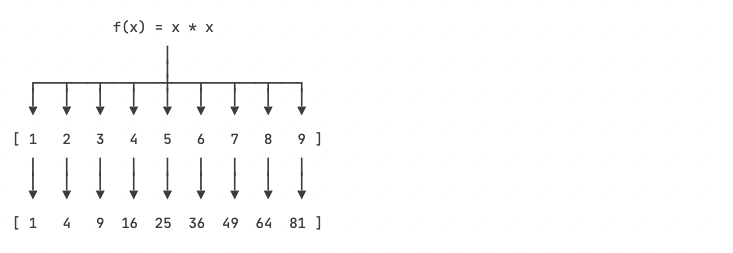

In [85]:
# Python代码
def f(x):
    return x * x
r = map(f, [1, 2, 3, 4, 5, 6, 7, 8, 9])
list(r)

[1, 4, 9, 16, 25, 36, 49, 64, 81]

In [86]:
# 再看组代码例子
L = []
for n in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
    L.append(f(n))
print(L)

list(map(str, [1, 2, 3, 4, 5, 6, 7, 8, 9]))

[1, 4, 9, 16, 25, 36, 49, 64, 81]


['1', '2', '3', '4', '5', '6', '7', '8', '9']

**reduce函数**

`reduce`把一个函数作用在一个序列`[x1, x2, x3, ...]`上，这个函数必须接收两个参数，`reduce`把结果继续和序列的下一个元素做累积计算，其效果就是：

`reduce(f, [x1, x2, x3, x4]) = f(f(f(x1, x2), x3), x4)`

In [87]:
# 比方说对一个序列求和，就可以用reduce实现：
from functools import reduce
def add(x, y):
    return x + y
reduce(add, [1, 3, 5, 7, 9])

25

**filter()函数**

用于过滤序列，和`map()`类似，`filter()`也接收一个函数和一个序列。和`map()`不同的是，`filter()`把传入的函数依次作用于每个元素，然后根据返回值是`True`还是`False`决定保留还是丢弃该元素。

例如，在一个list中，删掉偶数，只保留奇数，可以这么写：

In [88]:
def is_odd(n):
    return n % 2 == 1

list(filter(is_odd, [1, 2, 4, 5, 6, 9, 10, 15]))

[1, 5, 9, 15]

In [89]:
#把一个序列中的空字符串删掉，可以这么写：
def not_empty(s):
    return s and s.strip()

list(filter(not_empty, ['A', '', 'B', None, 'C', '  ']))

['A', 'B', 'C']

**sorted()函数**

Python内置的`sorted()`函数就可以对list进行排序：

In [90]:
sorted([36, 5, -12, 9, -21])

[-21, -12, 5, 9, 36]

In [91]:
# sorted()函数也是一个高阶函数，它还可以接收一个key函数来实现自定义的排序，例如给sorted传入key函数，即可实现忽略大小写的排序:
sorted(['bob', 'about', 'Zoo', 'Credit'], key=str.lower)

['about', 'bob', 'Credit', 'Zoo']

In [92]:
# 按绝对值大小排序：
sorted([36, 5, -12, 9, -21], key=abs)

TypeError: 'int' object is not callable

上方这个`'int' object is not callable` 报错，先查看上方报错信息并思考下什么原因后再往下阅读呢？

这个处理方案是重启notebook并注释或不运行开头的 `abs = 10`代码，当然，如果你打开notebook后本身还没有运行 `abs = 10`，那运行上方代码是不会报错了：

In [1]:
# 重启后再运行：
sorted([36, 5, -12, 9, -21], key=abs)

[5, 9, -12, -21, 36]

In [2]:
#要进行反向排序，不必改动key函数，可以传入第三个参数reverse=True
sorted(['bob', 'about', 'Zoo', 'Credit'], key=str.lower, reverse=True)

['Zoo', 'Credit', 'bob', 'about']

## 返回函数

高阶函数除了可以接受函数作为参数外，还可以把函数作为结果值返回。

我们来实现一个可变参数的求和。通常情况下，求和的函数是这样定义的：

In [3]:
def calc_sum(*args):
    ax = 0
    for n in args:
        ax = ax + n
    return ax

但是，如果不需要立刻求和，而是在后面的代码中，根据需要再计算怎么办？可以不返回求和的结果，而是返回求和的函数：

In [4]:
def lazy_sum(*args):
    def sum():
        ax = 0
        for n in args:
            ax = ax + n
        return ax
    return sum

当我们调用lazy_sum()时，返回的并不是求和结果，而是求和函数：

In [5]:
f = lazy_sum(1, 3, 5, 7, 9)
f

<function __main__.lazy_sum.<locals>.sum()>

调用函数f时，才真正计算求和的结果：

In [6]:
f()

25

在这个例子中，我们在函数`lazy_sum`中又定义了函数`sum`，并且，内部函数`sum`可以引用外部函数`lazy_sum`的参数和局部变量，当`lazy_sum`返回函数`sum`时，相关参数和变量都保存在返回的函数中，这种称为“闭包（Closure）”的程序结构拥有极大的威力。

请再注意一点，当我们调用`lazy_sum()`时，每次调用都会返回一个新的函数，即使传入相同的参数：

In [7]:
f1 = lazy_sum(1, 3, 5, 7, 9)
f2 = lazy_sum(1, 3, 5, 7, 9)
f1==f2

False

`f1()`和`f2()`的调用结果互不影响。

### 闭包

（本节内容阅读理解即可）

注意到返回的函数在其定义内部引用了局部变量`args`，所以，当一个函数返回了一个函数后，其内部的局部变量还被新函数引用，所以，闭包用起来简单，实现起来可不容易。

另一个需要注意的问题是，返回的函数并没有立刻执行，而是直到调用了`f()`才执行。我们来看一个例子：

In [8]:
def count():
    fs = []
    for i in range(1, 4):
        def f():
             return i*i
        fs.append(f)
    return fs

f1, f2, f3 = count()

在上面的例子中，每次循环，都创建了一个新的函数，然后，把创建的3个函数都返回了。

你可能认为调用`f1()`，`f2()`和`f3()`结果应该是`1`，`4`，`9`，但实际结果是：

In [9]:
f1()

9

In [10]:
f2()

9

In [11]:
f3()

9

全部都是`9`！原因就在于返回的函数引用了变量`i`，但它并非立刻执行。等到3个函数都返回时，它们所引用的变量`i`已经变成了`3`，因此最终结果为`9`。

**注意：返回闭包时牢记一点：返回函数不要引用任何循环变量，或者后续会发生变化的变量。**

如果一定要引用循环变量怎么办？方法是再创建一个函数，用该函数的参数绑定循环变量当前的值，无论该循环变量后续如何更改，已绑定到函数参数的值不变：

In [12]:
def count():
    def f(j):
        def g():
            return j*j
        return g
    fs = []
    for i in range(1, 4):
        fs.append(f(i)) # f(i)立刻被执行，因此i的当前值被传入f()
    return fs

再看看结果：

In [13]:
f1, f2, f3 = count()

In [14]:
f1()

1

In [15]:
f2()

4

In [16]:
f3()

9

缺点是代码较长，可利用lambda函数缩短代码，稍后会讲到lambda函数。

**nonlocal**

使用闭包，就是内层函数引用了外层函数的局部变量。如果只是读外层变量的值，我们会发现返回的闭包函数调用一切正常：

In [17]:
def inc():
    x = 0
    def fn():
        # 仅读取x的值:
        return x + 1
    return fn

f = inc()
print(f()) # 1
print(f()) # 1

1
1


但是，如果对外层变量赋值，由于Python解释器会把`x`当作函数`fn()`的局部变量，它会报错，原因是`x`作为局部变量并没有初始化，直接计算`x+1`是不行的。但我们其实是想引用`inc()`函数内部的`x`，所以需要在`fn()`函数内部加一个`nonlocal x`的声明。加上这个声明后，解释器把`fn()`的`x`看作外层函数的局部变量，它已经被初始化了，可以正确计算`x+1`。

In [18]:
def inc():
    x = 0
    def fn():
        nonlocal x  #如果没有nonlocal x则会报错。
        x = x + 1
        return x
    return fn

f = inc()
print(f()) # 1
print(f()) # 2

1
2


所以：
- 使用闭包时，对外层变量赋值前，需要先使用nonlocal声明该变量不是当前函数的局部变量
- 一个函数可以返回一个计算结果，也可以返回一个函数。
- 返回一个函数时，牢记该函数并未执行，返回函数中不要引用任何可能会变化的变量。

## 匿名函数

当我们在传入函数时，有些时候，不需要显式地定义函数，直接传入匿名函数更方便。

在Python中，对匿名函数提供了有限支持。还是以`map()`函数为例，计算`f(x)=x2`时，除了定义一个`f(x)`的函数外，还可以直接传入匿名函数：

In [19]:
list(map(lambda x: x * x, [1, 2, 3, 4, 5, 6, 7, 8, 9]))

[1, 4, 9, 16, 25, 36, 49, 64, 81]

通过对比可以看出，匿名函数`lambda x: x * x`实际上就是：

In [20]:
def f(x):
    return x * x

关键字`lambda`表示匿名函数，冒号前面的`x`表示函数参数。

匿名函数有个限制，就是只能有一个表达式，不用写`return`，返回值就是该表达式的结果。

用匿名函数有个好处，因为函数没有名字，不必担心函数名冲突。

## 装饰器

当前阅读**了解即可**,等后期有了一定的代码量后再掌握并应用。

由于函数也是一个对象，而且函数对象可以被赋值给变量，所以，通过变量也能调用该函数。

In [21]:
def now():
    print('2022-2-2')
    
f = now
f()

2022-2-2


函数对象有一个`__name__`属性（注意：是前后各两个下划线），可以拿到函数的名字：

In [22]:
now.__name__

'now'

In [23]:
f.__name__

'now'

现在，假设我们要增强`now()`函数的功能，比如，在函数调用前后自动打印日志，但又不希望修改`now()`函数的定义，这种在代码运行期间动态增加功能的方式，称之为“装饰器”（Decorator）。

本质上，decorator就是一个返回函数的高阶函数。所以，我们要定义一个能打印日志的decorator，可以定义如下：

In [24]:
def log(func):
    def wrapper(*args, **kw):
        print('call %s():' % func.__name__)
        return func(*args, **kw)
    return wrapper

观察上面的`log`，因为它是一个decorator，所以接受一个函数作为参数，并返回一个函数。我们要借助Python的`@`语法，把decorator置于函数的定义处：

In [25]:
@log
def now():
    print('2022-2-2')

调用`now()`函数，不仅会运行`now()`函数本身，还会在运行`now()`函数前打印一行日志：

In [26]:
now()

call now():
2022-2-2


把`@log`放到`now()`函数的定义处，相当于执行了语句：
```
now = log(now)
```

由于`log()`是一个decorator，返回一个函数，所以，原来的`now()`函数仍然存在，只是现在同名的`now`变量指向了新的函数，于是调用`now()`将执行新函数，即在`log()`函数中返回的`wrapper()`函数。

`wrapper()`函数的参数定义是`(*args, **kw)`，因此，`wrapper()`函数可以接受任意参数的调用。在`wrapper()`函数内，首先打印日志，再紧接着调用原始函数。

如果decorator本身需要传入参数，那就需要编写一个返回decorator的高阶函数，写出来会更复杂。比如，要自定义log的文本：

In [27]:
def log(text):
    def decorator(func):
        def wrapper(*args, **kw):
            print('%s %s():' % (text, func.__name__))
            return func(*args, **kw)
        return wrapper
    return decorator

这个3层嵌套的decorator用法如下：

In [28]:
@log('execute')
def now():
    print('202-2-2')

In [29]:
now()

execute now():
202-2-2


和两层嵌套的decorator相比，3层嵌套的效果是这样的：

In [30]:
now = log('execute')(now)

我们来剖析上面的语句，首先执行`log('execute')`，返回的是decorator函数，再调用返回的函数，参数是`now`函数，返回值最终是`wrapper`函数。

以上两种decorator的定义都没有问题，但还差最后一步。因为我们讲了函数也是对象，它有`__name__`等属性，但你去看经过decorator装饰之后的函数，它们的`__name__`已经从原来的`'now'`变成了`'wrapper'`：

In [31]:
now.__name__

'wrapper'

因为返回的那个`wrapper()`函数名字就是`'wrapper'`，所以，需要把原始函数的`__name__`等属性复制到`wrapper()`函数中，否则，有些依赖函数签名的代码执行就会出错。

## 偏函数

此处只是个简单的概念，了解即可。

Python的`functools`模块提供了很多有用的功能，其中一个就是偏函数（Partial function）。要注意，这里的偏函数和数学意义上的偏函数不一样。

在介绍函数参数的时候，我们讲到，通过设定参数的默认值，可以降低函数调用的难度。而偏函数也可以做到这一点。

`int()`函数可以把字符串转换为整数，当仅传入字符串时，`int()`函数默认按十进制转换：

In [32]:
int('12345')

12345

但`int()`函数还提供额外的`base`参数，默认值为`10`。如果传入`base`参数，就可以做N进制的转换：

In [33]:
int('12345', base=8)

5349

假设要转换大量的二进制字符串，每次都传入`int(x, base=2)`非常麻烦，于是，我们想到，可以定义一个`int2()`的函数，默认把`base=2`传进去：

In [34]:
def int2(x):
    return int(x, 2)

这样，我们转换二进制就非常方便了：

In [35]:
int2('1000000')

64

`functools.partial`就是帮助我们创建一个偏函数的，不需要我们自己定义`int2()`，可以直接使用下面的代码创建一个新的函数`int2`：

In [36]:
import functools
int2 = functools.partial(int, base=2)
int2('1000000')

64

所以，简单总结`functools.partial`的作用就是，把一个函数的某些参数给固定住（也就是设置默认值），返回一个新的函数，调用这个新函数会更简单。

## 模块

在计算机程序的开发过程中，随着程序代码越写越多，在一个文件里代码就会越来越长，越来越不容易维护。

为了编写可维护的代码，我们把很多函数分组，分别放到不同的文件里，这样，每个文件包含的代码就相对较少，很多编程语言都采用这种组织代码的方式。在Python中，一个.py文件就称之为一个模块（Module）。

使用模块有什么好处？

最大的好处是大大提高了代码的可维护性。其次，编写代码不必从零开始。当一个模块编写完毕，就可以被其他地方引用。我们在编写程序的时候，也经常引用其他模块，包括Python内置的模块和来自第三方的模块。

使用模块还可以避免函数名和变量名冲突。相同名字的函数和变量完全可以分别存在不同的模块中，因此，我们自己在编写模块时，不必考虑名字会与其他模块冲突。但是也要注意，尽量不要与内置函数名字冲突。

你也许还想到，如果不同的人编写的模块名相同怎么办？为了避免模块名冲突，Python又引入了按目录来组织模块的方法，称为包（Package）。

举个例子，一个`abc.py`的文件就是一个名字叫`abc`的模块，一个`xyz.py`的文件就是一个名字叫`xyz`的模块。

现在，假设我们的`abc`和`xyz`这两个模块名字与其他模块冲突了，于是我们可以通过包来组织模块，避免冲突。方法是选择一个顶层包名，比如`mycompany`，按照如下目录存放：

```
mycompany
├─ __init__.py
├─ abc.py
└─ xyz.py
```

引入了包以后，只要顶层的包名不与别人冲突，那所有模块都不会与别人冲突。现在，`abc.py`模块的名字就变成了`mycompany.abc`，类似的，`xyz.py`的模块名变成了`mycompany.xyz`。

请注意，每一个包目录下面都会有一个`__init__.py`的文件，这个文件是必须存在的，否则，Python就把这个目录当成普通目录，而不是一个包。`__init__.py`可以是空文件，也可以有Python代码，因为`__init__.py`本身就是一个模块，而它的模块名就是`mycompany`。

类似的，可以有多级目录，组成多级层次的包结构。比如如下的目录结构：

```
mycompany
 ├─ web
 │  ├─ __init__.py
 │  ├─ utils.py
 │  └─ www.py
 ├─ __init__.py
 ├─ abc.py
 └─ utils.py
```

文件`www.py`的模块名就是`mycompany.web.www`，两个文件`utils.py`的模块名分别是`mycompany.utils`和`mycompany.web.utils`。

⚠️<font color=red>自己创建模块时要注意命名，不能和Python自带的模块名称冲突。例如，系统自带了sys模块，自己的模块就不可命名为sys.py，否则将无法导入系统自带的sys模块。</font>

`mycompany.web`也是一个模块，请指出该模块对应的.py文件。

小结：

模块是一组Python代码的集合，可以使用其他模块，也可以被其他模块使用。

创建自己的模块时，要注意：

- 模块名要遵循Python变量命名规范，不要使用中文、特殊字符；
- 模块名不要和系统模块名冲突，最好先查看系统是否已存在该模块，检查方法是在Python交互环境执行`import abc`，若成功则说明系统存在此模块。

### 使用模块

Python本身就内置了很多非常有用的模块，只要安装完毕，这些模块就可以立刻使用。

我们以内建的`sys`模块为例，编写一个`hello`的模块：

In [37]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*- 

' a test module '

__author__ = 'Michael Liao'

import sys

def test():
    args = sys.argv
    if len(args)==1:
        print('Hello, world!')
    elif len(args)==2:
        print('Hello, %s!' % args[1])
    else:
        print('Too many arguments!')

if __name__=='__main__':
    test()

Too many arguments!


第1行和第2行是标准注释，第1行注释可以让这个`hello.py`文件直接在Unix/Linux/Mac上运行，第2行注释表示.py文件本身使用标准UTF-8编码；

第4行是一个字符串，表示模块的文档注释，任何模块代码的第一个字符串都被视为模块的文档注释；

第6行使用`__author__`变量把作者写进去，此处内容引用自Michael Liao的博客，如果是自己写的代码，则可以写上自己的名字，这样当你公开源代码后别人就可以瞻仰你的大名；

以上就是Python模块的标准文件模板，当然也可以全部删掉不写，但是，按标准办事肯定没错。

后面开始就是真正的代码部分。

你可能注意到了，使用`sys`模块的第一步，就是导入该模块：

In [38]:
import sys

导入`sys`模块后，我们就有了变量`sys`指向该模块，利用`sys`这个变量，就可以访问`sys`模块的所有功能。

`sys`模块有一个`argv`变量，用list存储了命令行的所有参数。`argv`至少有一个元素，因为第一个参数永远是该.py文件的名称，例如：

运行`python3 hello.py`获得的`sys.argv`就是`['hello.py']`；

运行`python3 hello.py Michael`获得的`sys.argv`就是`['hello.py', 'Michael']`。

最后，注意到这两行代码：


```
if __name__=='__main__':
    test()
```


当我们在命令行运行`hello`模块文件时，Python解释器把一个特殊变量`__name__`置为`__main__`，而如果在其他地方导入该`hello`模块时，`if`判断将失败，因此，这种`if`测试可以让一个模块通过命令行运行时执行一些额外的代码，最常见的就是运行测试代码。

**作用域**

在一个模块中，我们可能会定义很多函数和变量，但有的函数和变量我们希望给别人使用，有的函数和变量我们希望仅仅在模块内部使用。在Python中，是通过`_`前缀来实现的。

正常的函数和变量名是公开的（public），可以被直接引用，比如：`abc`，`x123`，`PI`等；

类似`__xxx__`这样的变量是特殊变量，可以被直接引用，但是有特殊用途，比如上面的`__author__`，`__name__`就是特殊变量，`hello`模块定义的文档注释也可以用特殊变量`__doc__`访问，我们自己的变量一般不要用这种变量名；

类似`_xxx`和`__xxx`这样的函数或变量就是非公开的（private），不应该被直接引用，比如`_abc`，`__abc`等；

之所以我们说，private函数和变量“不应该”被直接引用，而不是“不能”被直接引用，是因为Python并没有一种方法可以完全限制访问private函数或变量，但是，从编程习惯上不应该引用private函数或变量。

### 安装包

在Python中，安装第三方模块，可以通过包管理工具pip完成的。而通过Ancaonda安装的jupyter notebook环境内置pip和大量数据科学常用包，如果偶尔需要新安装包时执行`!pip install 包名称`，如果是命令行或终端页面，执行`pip install 包名称`，不需要加`!`

In [39]:
# !pip install numpy

**模块搜索路径**

当我们试图加载一个模块时，Python会在指定的路径下搜索对应的.py文件，默认情况下，Python解释器会搜索当前目录、所有已安装的内置模块和第三方模块，搜索路径存放在`sys`模块的`path`变量中,如果我们要添加自己的搜索目录，有两种方法：

一是直接修改sys.path，添加要搜索的目录：

In [40]:
import sys
#sys.path.append('替换为要搜索的路径')

这种方法是在运行时修改，运行结束后失效。

第二种方法是设置环境变量`PYTHONPATH`，该环境变量的内容会被自动添加到模块搜索路径中。设置方式与设置Path环境变量类似。注意只需要添加你自己的搜索路径，Python自己本身的搜索路径不受影响。

# 面向对象编程

因为在开始学习人工智能的后续课程后，需要学习数据处理与可视化、建模基础等，有较长一段时间这部分知识基本不用，会出现应用断层，所以当前不要求会写，只要求理解，后期需要时再复习，届时因为有了更高的代码量，理解和应用也会更简单，所以阅读理解https://www.liaoxuefeng.com/wiki/1016959663602400/1017495723838528 中：

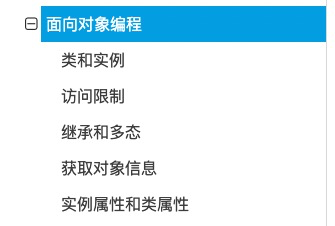

**阅读目标**：理解类方法、实例方法、类属性、实例属性的区别，理解继承与多态的概念。

# 进程与线程

快速阅读https://www.zhihu.com/question/25532384 ，对计算机进程与线程的区别有映像即可。
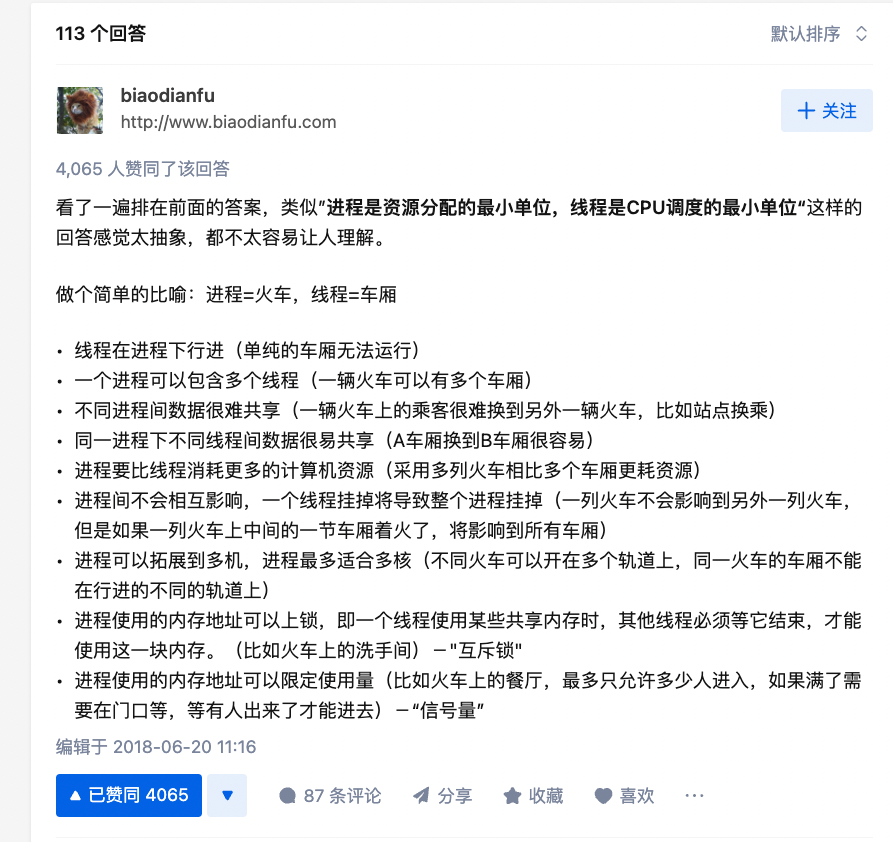看完后别忘了去给答主点个赞

# 时间处理

搜索材料并掌握python的内置模块`datetime`，并实现以下任务：

In [47]:
# 获取当前日期

# 获取当前时间

# 能灵活设置常见格式化输出，比如'2022-02-02 09:30:50'或者时间和日期反过来

# 返回星期几

# 返回两个日期/时间相差多少天/小时/分钟/秒

# IO编程

IO在计算机中指Input/Output，也就是输入和输出。即常见的文件读写、新建、删除等操作。自学并依次完成以下任务：

In [46]:
# 手动新建一个txt文件，写入一些文本，用python打开文件，读取其中内容。

In [49]:
# 使用python创建一个txt文本文件，并写入内容 "io编程"